# t-SNE from Scratch (ft. NumPy)

In [24]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [25]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=1000)
y_mnist = y.loc[X_mnist.index]

X = PCA(n_components=30).fit_transform(X_mnist)

In [26]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-250.672910,111.425097,-198.276455,305.196860,320.583211,848.565648,758.260726,227.697020,-274.909215,-312.886924,...,-129.960971,-132.907128,-293.933714,59.820696,-358.468207,307.722406,19.151947,138.635766,66.499722,126.461527
1,925.839855,1391.664919,-548.886345,562.526157,-58.131814,-211.644831,-551.797407,571.877103,229.094411,109.004067,...,-203.987015,63.604120,205.051206,199.959600,-57.607159,-135.032993,46.979467,116.370896,200.517708,-326.050760
2,-685.263769,149.703774,-322.249531,-423.549308,-14.080305,-225.551043,-411.816124,92.024166,5.229143,-18.328775,...,-25.712516,236.957020,93.014239,-204.377439,36.786996,172.356975,220.900613,-60.536161,147.131775,-31.270131
3,-515.797154,-191.697231,760.676127,133.593942,-235.194171,-138.691951,-99.264718,-69.872350,-105.023698,270.510822,...,-19.598204,-442.106946,50.064465,-248.058328,125.624247,143.524027,-157.246673,11.541405,168.686289,-212.089281
4,-950.384928,360.394102,26.903117,-519.170690,-56.542546,412.710704,-346.885434,-74.415243,179.103284,12.123948,...,131.655722,-61.410208,-135.164449,133.857523,107.127759,81.235953,27.440615,67.010562,47.711192,-18.907081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-930.188936,223.483053,-2.479382,-311.403922,-401.665018,46.375991,-361.275403,-3.721275,221.283842,-225.744158,...,37.138663,72.491268,147.081019,-215.360780,-73.769133,60.361315,304.132384,-31.069245,-221.448659,-20.196162
996,1117.856972,182.201932,-55.669348,-161.070550,-1143.932407,462.245969,147.849048,388.481494,456.020191,494.495251,...,-301.517083,-220.347691,100.054160,103.056625,-3.177592,98.396444,22.202667,192.717626,-132.275008,313.448395
997,-8.263370,-768.611588,23.082552,-46.836906,726.194886,-62.061281,-377.495208,-197.377735,-25.845258,387.779885,...,200.223954,-141.243978,-57.616820,-102.655749,-204.026731,-119.088785,54.631227,90.583165,-44.486473,51.737722
998,-922.697282,50.227407,600.673083,-320.221153,-284.226814,-91.851431,-23.950585,162.757119,329.364621,-168.388325,...,-36.222177,-5.460870,-301.289062,-8.242431,-90.068217,125.144798,-26.454046,-138.331886,-180.204473,-54.875307


In [27]:
import tsne

X = np.array(X)

p_ij = tsne.get_original_pairwise_affinities(X)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 



In [28]:
pd.DataFrame(p_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,5.799398e-14,2.663262e-08,3.481900e-08,5.886584e-07,4.025568e-09,1.624915e-06,4.196732e-11,1.739170e-08,1.465816e-06,...,1.976525e-07,8.360962e-11,7.751612e-08,6.425529e-06,8.443290e-07,4.755872e-08,3.345651e-12,4.799245e-09,5.983975e-08,2.135117e-07
1,2.195250e-10,4.940656e-324,1.166678e-08,1.905903e-10,1.037858e-10,1.745075e-10,3.809729e-07,1.046971e-13,1.708749e-11,3.831384e-08,...,2.116626e-10,1.103794e-12,1.494380e-09,7.336714e-11,4.590783e-10,6.388898e-10,1.764425e-07,2.225739e-12,9.536822e-12,1.325903e-11
2,4.187631e-11,5.997069e-16,4.940656e-324,4.603720e-08,4.264150e-04,2.209659e-07,3.670956e-04,3.911562e-15,1.529416e-05,9.856510e-11,...,6.052476e-05,6.647938e-14,6.514483e-05,4.372416e-11,6.916724e-08,3.961490e-02,3.032847e-18,1.914817e-08,6.688903e-06,2.435782e-05
3,1.333559e-10,3.046823e-18,8.118736e-08,4.940656e-324,6.458919e-07,4.124429e-05,6.522442e-07,4.402007e-12,4.535877e-05,8.896874e-10,...,3.392227e-04,6.737961e-14,1.321872e-02,2.015115e-07,3.128161e-12,5.516995e-06,1.365425e-14,9.977958e-08,1.924320e-03,4.924510e-04
4,1.715861e-19,2.737497e-38,9.678762e-10,1.929034e-15,4.940656e-324,2.436223e-21,3.416335e-13,5.037371e-33,7.207420e-14,4.185657e-26,...,4.927000e-12,3.256771e-32,9.451118e-11,1.365464e-23,9.715465e-22,9.168254e-06,2.926875e-35,3.514619e-18,1.614171e-10,7.941369e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.275419e-14,1.006042e-23,9.169906e-04,7.702531e-09,1.408897e-03,2.973939e-11,2.485327e-07,5.593295e-20,3.110306e-06,9.402971e-14,...,1.144953e-07,3.777569e-21,2.227783e-06,2.342654e-14,9.929104e-13,4.940656e-324,5.193025e-22,1.031650e-13,5.997847e-05,2.031605e-09
996,6.977626e-08,7.944232e-07,1.014879e-08,2.675104e-07,1.821487e-08,1.648530e-08,1.269923e-06,3.847979e-08,4.809937e-08,6.318467e-06,...,2.131840e-07,1.871384e-04,5.701141e-08,5.904959e-07,7.083343e-10,5.317601e-08,4.940656e-324,5.105414e-09,1.691171e-08,1.246044e-07
997,1.823858e-10,1.602451e-18,1.757047e-07,4.268750e-07,1.340889e-07,8.253736e-10,4.501799e-09,2.790705e-13,1.654258e-10,5.378343e-11,...,3.562268e-08,2.347345e-12,9.736111e-06,2.702486e-08,9.336332e-09,8.804787e-09,5.350564e-16,4.940656e-324,8.737824e-10,4.430967e-06
998,9.841653e-21,1.343311e-42,9.546234e-11,9.610313e-06,8.258143e-08,2.940162e-07,2.451833e-12,6.851062e-23,6.282984e-03,1.141057e-26,...,1.116008e-06,5.797532e-32,8.295479e-05,2.420430e-21,4.238388e-22,9.088941e-05,8.926583e-36,4.258697e-22,4.940656e-324,3.725729e-11


In [29]:
p_ij_symmetric = tsne.get_symmetric_p_ij(p_ij)

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 



In [30]:
pd.DataFrame(p_ij_symmetric)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,1.097915e-13,1.333725e-11,1.747618e-11,2.943292e-10,2.811907e-12,8.124994e-10,7.662285e-10,8.695852e-12,2.039221e-09,...,9.882624e-11,4.987018e-11,3.881289e-11,1.732785e-08,4.412223e-10,2.377937e-11,3.488980e-11,2.490815e-12,2.991987e-11,1.071507e-10
1,1.097915e-13,4.940656e-324,5.833391e-12,9.529513e-14,5.189289e-14,8.728205e-14,1.904865e-10,7.584506e-14,8.543745e-15,1.918061e-11,...,1.058313e-13,2.169491e-15,7.471901e-13,3.668446e-14,2.295393e-13,3.194449e-13,4.854329e-10,1.112870e-15,4.768411e-15,6.629513e-15
2,1.333725e-11,5.833391e-12,4.940656e-324,6.361228e-11,2.132080e-07,1.393993e-09,2.386358e-07,6.035730e-10,7.647082e-09,4.345635e-11,...,3.267336e-08,1.059851e-10,8.299845e-08,2.219832e-11,2.486489e-10,2.026595e-05,5.074396e-12,9.742645e-11,3.344499e-09,1.776175e-08
3,1.747618e-11,9.529513e-14,6.361228e-11,4.940656e-324,3.229459e-10,5.340696e-08,3.315623e-10,8.424633e-09,2.267939e-08,1.305895e-10,...,2.095617e-07,5.877784e-11,1.950750e-05,2.247078e-08,1.513018e-14,2.762349e-09,1.337552e-10,2.633273e-10,9.669652e-07,3.150943e-07
4,2.943292e-10,5.189289e-14,2.132080e-07,3.229459e-10,4.940656e-324,1.557561e-11,2.220195e-10,1.570841e-10,3.603710e-17,1.232981e-12,...,4.596740e-10,6.600336e-12,1.001927e-07,1.025753e-11,1.085098e-12,7.090326e-07,9.107433e-12,6.704443e-11,4.137142e-11,7.866464e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.377937e-11,3.194449e-13,2.026595e-05,2.762349e-09,7.090326e-07,4.383910e-10,4.638935e-09,6.722170e-10,1.555153e-09,1.345989e-10,...,7.241090e-10,7.514982e-12,2.879285e-07,6.477643e-11,1.307851e-11,4.940656e-324,2.658800e-11,4.402445e-12,7.543394e-08,3.738159e-10
996,3.488980e-11,4.854329e-10,5.074396e-12,1.337552e-10,9.107433e-12,8.242813e-12,6.349614e-10,1.180685e-10,2.404969e-11,3.163993e-09,...,1.065920e-10,1.758682e-07,2.850571e-11,2.952811e-10,3.541672e-13,2.658800e-11,4.940656e-324,2.552707e-12,8.455853e-12,6.230219e-11
997,2.490815e-12,1.112870e-15,9.742645e-11,2.633273e-10,6.704443e-11,3.616291e-12,2.251105e-12,3.912917e-10,8.271292e-14,1.355453e-12,...,1.781135e-11,5.352015e-11,6.504184e-09,6.211311e-10,7.503908e-12,4.402445e-12,2.552707e-12,4.940656e-324,4.368912e-13,2.520295e-09
998,2.991987e-11,4.768411e-15,3.344499e-09,9.669652e-07,4.137142e-11,1.538702e-07,2.363670e-11,1.923524e-08,3.141492e-06,4.155090e-13,...,1.801773e-07,7.623322e-12,4.576447e-06,3.112972e-11,2.158391e-13,7.543394e-08,8.455853e-12,4.368912e-13,4.940656e-324,1.140897e-09


In [31]:
y0 = tsne.initialization(X, 2, "random")

In [32]:
pd.DataFrame(y0)

,0,1
0,0.000162,-0.000204
1,0.000056,0.000044
2,0.000073,-0.000091
3,0.000168,-0.000012
4,0.000101,0.000018
...,...,...
995,-0.000091,0.000104
996,-0.000080,0.000148
997,-0.000068,-0.000006
998,0.000068,0.000060


In [33]:
q_ij = tsne.get_low_dimensional_affinities(y0)

In [34]:
pd.DataFrame(q_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
1,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
2,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
3,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
4,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
996,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06
997,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06
998,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06


In [35]:
gradient = tsne.get_gradient(p_ij_symmetric, q_ij, y0)

In [36]:
pd.DataFrame(gradient)

,0,1
0,1.531313e-07,4.914703e-08
1,-1.463524e-07,-2.227797e-07
2,1.646384e-07,2.131138e-08
3,1.730904e-07,-1.703916e-07
4,1.548544e-07,6.195208e-08
...,...,...
995,2.564592e-07,-8.032520e-08
996,-1.403617e-07,-2.838996e-07
997,-2.963850e-08,-2.607627e-07
998,1.758518e-07,1.965148e-07


In [37]:
# solution, Y = tsne.low_dimensional_embedding(p_ij_symmetric, y0, T=1000, η=200, early_exaggeration=4, n_dimensions=2)

In [45]:
solution, Y = tsne.tsne(
    X, perplexity=10, T=1000, η=200, early_exaggeration=4, n_dimensions=2
)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 4.445580862223341
Iteration 50: Value of Cost Function is 3.084038944431036
Iteration 100: Value of Cost Function is 2.8136905025315047
Iteration 150: Value of Cost Function is 2.7329451982846913
Iteration 200: Value of Cost Function is 2.699950720087676
Iteration 250: Value of Cost Function is 2.6730417695701405
Iteration 300: Value of Cost Function is 1.6101467939774092
Iteration 350: Value of Cost Function is 1.4259999189330865
Iteration 400: Value of Cost Function is 1.331529670710027
Iteration 450: Value of Cost Function is 1.2711746324481996
Iteration 500: Value of Cost Function is 1.2284039770860102
Iteration 550: Value of Cost Function is 1.1961206400724727
Iteration 600: Value of Cost Function is 1.1706494028390821
Iteration 650: Value of Cost Function is 

In [46]:
pd.DataFrame(solution)

,0,1
0,-2.720574,14.512956
1,16.916466,-26.535952
2,-8.665371,-32.531387
3,-12.713348,-10.963200
4,-30.589571,25.303066
...,...,...
995,-24.423601,22.496659
996,28.032329,-24.384738
997,25.321299,17.303533
998,-7.589110,25.372664


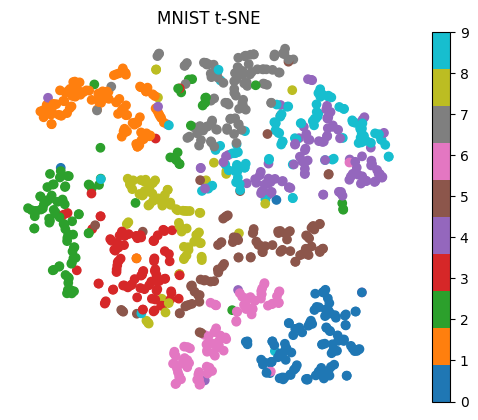

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g1 = ax.scatter(solution[:, 0], solution[:, 1], c=y_mnist, cmap="tab10")
ax.axis("off")
ax.set_title("MNIST t-SNE")
plt.colorbar(g1, ax=ax)
plt.show()

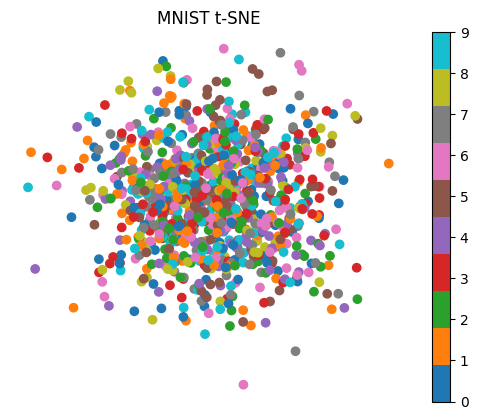

MovieWriter ffmpeg unavailable; using Pillow instead.


In [48]:
from matplotlib import animation

fig, ax = plt.subplots()
ax.axis("off")
ax.set_title("MNIST t-SNE")
scat = ax.scatter(Y[1][:, 0], Y[1][:, 1], c=y_mnist, cmap="tab10")
plt.colorbar(scat, ax=ax)
plt.show()

# t-SNE Descent Animation
ys = []
prelims = list(range(0, 50, 5))
early_range = list(range(50, 250, 10))
mid_range_1 = list(range(250, 300, 5))
mid_range_2 = list(range(300, 400, 10))
end_range = list(range(400, 1000, 50))

visual_range = (
    prelims
    + early_range
    + mid_range_1
    + mid_range_2
    + end_range
    + [999, 999, 999, 999, 999, 999, 999]
)

for i in visual_range:
    ys.append(Y[i])


def strike(text):
    result = ""
    for c in text:
        result = result + c + "\u0336"
    return result


def animate(iterations):
    scat.set_offsets(ys[iterations])
    if iterations < 31:
        ax.text(
            0.05,
            1,
            "Early Exaggeration",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )
    else:
        ax.text(
            0.05,
            1,
            strike("                  "),
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )

    ax.set_xlim(
        [1.25 * np.min(ys[iterations][:, 0]), 1.25 * np.max(ys[iterations][:, 0])]
    )
    ax.set_ylim(
        [1.25 * np.min(ys[iterations][:, 1]), 1.25 * np.max(ys[iterations][:, 1])]
    )


rot_animation = animation.FuncAnimation(
    fig, animate, frames=len(ys) - 1, interval=350, blit=False
)

rot_animation.save("MNIST.gif", dpi=250)